In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
from datetime import datetime

In [2]:
def formatar_df(dataframe):

    # Formatar coluna de data
    dataframe["Data"] = dataframe["Data"].astype(str)

    # Substituir formatos de data por barras
    substituicoes = [". de ", " de ", ".", " - ", "-", " "]
    substituicoes_para = ["/", "/", "/", "/", "/", ""]

    for orig, para in zip(substituicoes, substituicoes_para):
        dataframe["Data"] = dataframe["Data"].str.replace(orig, para)

    # Substituir iniciais de meses por número correspondente
    meses = {
        "Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04", "May": "05",
        "June": "06", "July": "07", "Jun": "06", "Jul": "07", "Aug": "08",
        "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12", "jan": "01",
        "fev": "02", "mar": "03", "abr": "04", "mai": "05", "junho": "06",
        "julho": "07", "jun": "06", "jul": "07", "ago": "08", "set": "09",
        "out": "10", "nov": "11", "dez": "12"
    }

    for mes in meses.keys():
        dataframe["Data"] = dataframe["Data"].str.replace(mes, meses[mes])

    # Transformar a coluna de data em datetime
    formatos_data = ["%Y/%m", "%d/%m/%Y", "%Y/%m/%d"]
    for formato in formatos_data:
        try:
            dataframe["Data"] = pd.to_datetime(dataframe["Data"], format=formato)
            break
        except ValueError:
            continue

    dataframe = dataframe.dropna()
    
    return dataframe

**Limpeza de dados: PIB do Brasil**

In [3]:
pib_br = pd.read_csv("PIB 1995-2024.csv", sep=",")
pib_br = pd.DataFrame(pib_br)
pib_br.columns.values[1] = 'PIB Brasil'
pib_br.columns.values[0] = 'Data'
pib_br = formatar_df(pib_br)
pib_br

,Data,PIB Brasil
0,1995-01-01,47028.6
1,1995-02-01,49954.5
2,1995-03-01,60024.3
3,1995-04-01,57789.5
4,1995-05-01,56350.5
...,...,...
348,2024-01-01,874397.9
349,2024-02-01,885318.1
350,2024-03-01,954200.8
351,2024-04-01,953853.0


**Limpeza de dados: PIB dos EUA**

In [4]:
pib_usa = pd.read_csv("GDP 1992-2024.csv", sep=",")
pib_usa = pd.DataFrame(pib_usa)
pib_usa = pib_usa.rename(columns={"Unnamed: 0": "Data"})
pib_usa = pib_usa.rename(columns={"Monthly Nominal GDP Index": "PIB EUA"})
pib_usa = pib_usa.rename(columns={"Monthly Real GDP Index": "PIB EUA Real"})
pib_usa = pib_usa[["Data", "PIB EUA", "PIB EUA Real"]]
pib_usa = formatar_df(pib_usa)
pib_usa

,Data,PIB EUA,PIB EUA Real
0,1992-01-01,6315.725,10177.827
1,1992-02-01,6356.505,10222.906
2,1992-03-01,6417.077,10307.949
3,1992-04-01,6443.256,10314.307
4,1992-05-01,6433.810,10293.475
...,...,...,...
380,2023-09-01,27819.284,22561.706
381,2023-10-01,27740.325,22509.894
382,2023-11-01,27952.750,22686.169
383,2023-12-01,28177.919,22846.137


**Limpeza de dados: IBOV**

In [5]:
ibov = pd.read_csv("BVSP 1993-2024.csv", sep=",")
ibov = pd.DataFrame(ibov)
ibov = ibov.rename(columns={"Date": "Data"})
ibov = ibov.rename(columns={"Close": "Fechamento IBOV"})
ibov = ibov[["Data", "Fechamento IBOV"]]
ibov = formatar_df(ibov)
ibov

,Data,Fechamento IBOV
0,1995-01-01,3885.000000
1,1995-02-01,3270.899902
2,1995-03-01,2979.000000
3,1995-04-01,3813.699951
4,1995-05-01,3720.600098
...,...,...
344,2023-09-01,116565.000000
345,2023-10-01,113144.000000
346,2023-11-01,127331.000000
347,2023-12-01,134185.000000


**Limpeza de dados: S&P500**

In [6]:
sp500 = pd.read_csv("SP500 1993-2024.csv", sep=",")
sp500 = sp500.rename(columns={"Fechamento*": "Fechamento S&P500"})
sp500 = sp500[["Data", "Fechamento S&P500"]]
sp500 = formatar_df(sp500)
sp500["Fechamento S&P500"] = sp500["Fechamento S&P500"].str.replace(".", "").str.replace(",", ".")
sp500

,Data,Fechamento S&P500
0,2024-06-28,5460.48
1,2024-06-01,5460.48
2,2024-05-01,5277.51
3,2024-04-01,5035.69
4,2024-03-01,5254.35
...,...,...
370,1993-09-01,458.93
371,1993-08-01,463.56
372,1993-07-01,448.13
373,1993-06-01,450.53


In [7]:
dados = pd.merge(pib_usa, pib_br, on="Data")
dados = pd.merge(dados, ibov, on="Data")
dados = pd.merge(dados, sp500, on="Data")

dados.set_index('Data', inplace=True)

dados = dados.apply(pd.to_numeric, errors="coerce")
dados = dados.groupby(pd.Grouper(freq='ME')).mean()
dados = dados.dropna()

dados.describe()

,PIB EUA,PIB EUA Real,PIB Brasil,Fechamento IBOV,Fechamento S&P500
count,320.000000,320.000000,320.000000,320.000000,320.000000
mean,15441.532431,16873.524806,346964.951406,49719.763750,1800.099156
std,5307.442815,3027.516858,244299.677426,35155.249806,1070.502274
min,7488.440000,11272.200000,49954.500000,2979.000000,470.420000
25%,10847.494250,14434.035750,122159.050000,14627.500000,1110.637500
50%,14761.492500,16788.606000,280626.750000,51007.500000,1362.885000
75%,18964.990250,19125.152750,528879.775000,67518.750000,2179.902500
max,28177.919000,22846.137000,950525.300000,134185.000000,4845.650000


**Funções para plotagem**

In [8]:
def plot_regressao(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    sns.regplot(x=x, y=y, data=dados, ci=None)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def plot_linha_tempo(cols, labels, title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 7))
    for col, label in zip(cols, labels):
        plt.plot(dados.index, dados[col], label=label)
    plt.xlabel("Ano")
    plt.ylabel("Valor")
    plt.title(title)
    plt.legend()
    plt.show()

def correlacao(coluna1, coluna2):
    correlacao, _ = pearsonr(dados[coluna1], dados[coluna2])
    print(f"\nCorrelação: {correlacao}")

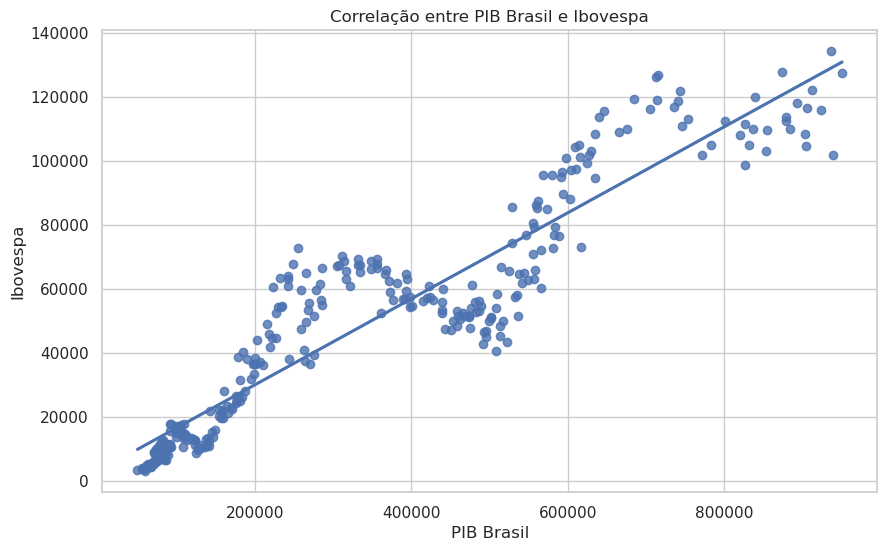


Correlação: 0.9337325832010106


In [9]:
plot_regressao(
    "PIB Brasil",
    "Fechamento IBOV",
    "PIB Brasil",
    "Ibovespa",
    "Correlação entre PIB Brasil e Ibovespa",
)
correlacao("PIB Brasil", "Fechamento IBOV")

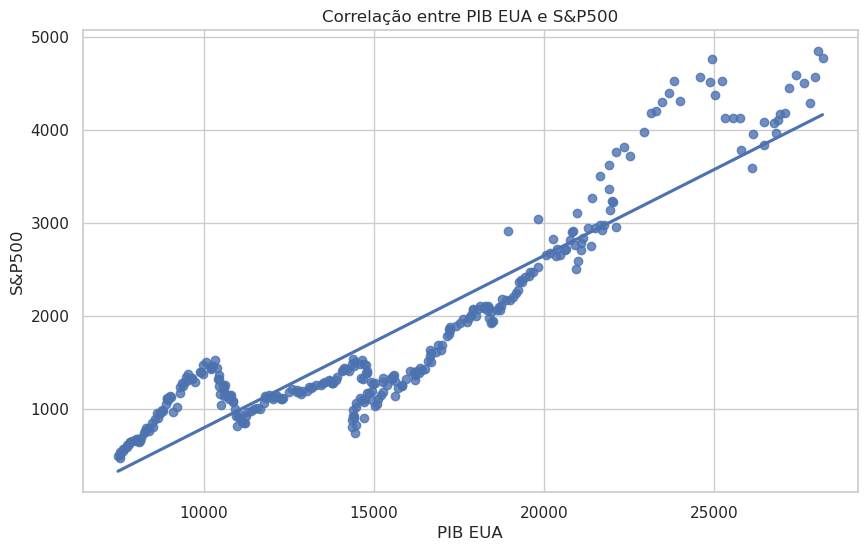


Correlação: 0.9197052627289628


In [28]:
plot_regressao(
    "PIB EUA",
    "Fechamento S&P500",
    "PIB EUA",
    "S&P500",
    "Correlação entre PIB EUA e S&P500",
)
correlacao("PIB EUA", "Fechamento S&P500")

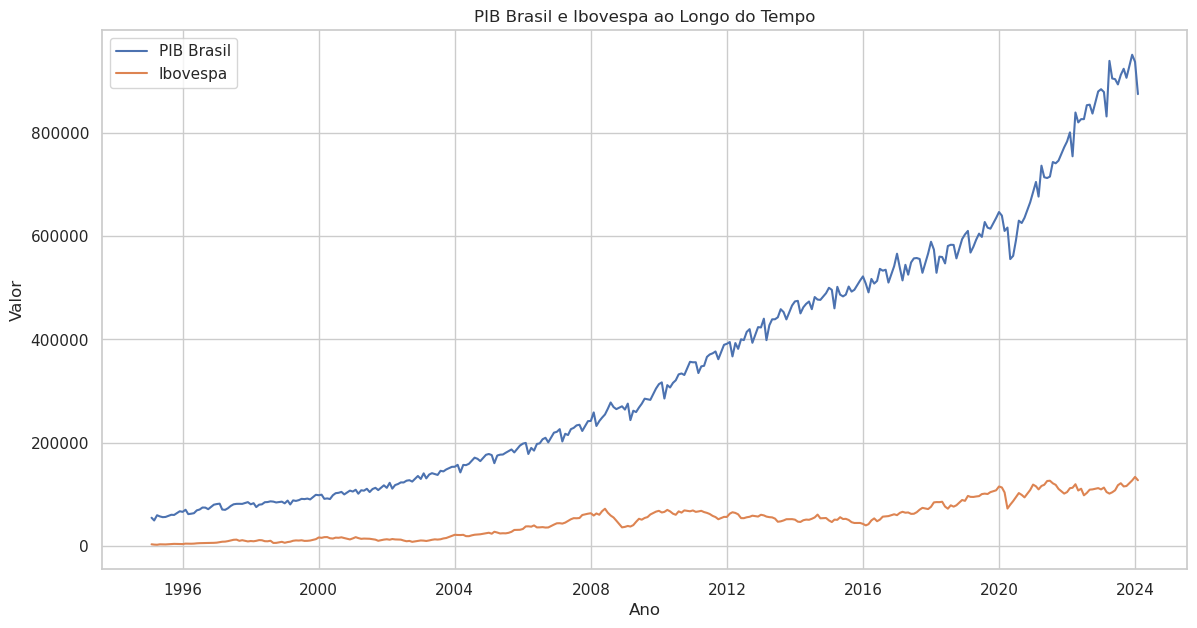

In [11]:
plot_linha_tempo(
    ["PIB Brasil", "Fechamento IBOV"],
    ["PIB Brasil", "Ibovespa"],
    "PIB Brasil e Ibovespa ao Longo do Tempo",
)

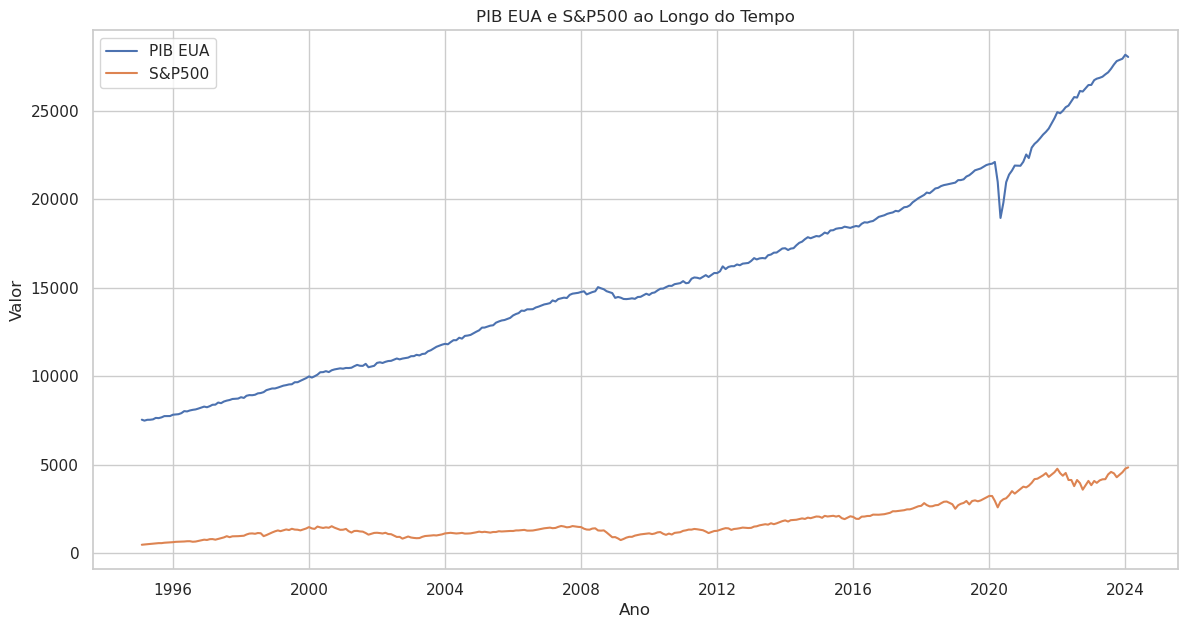

In [12]:
plot_linha_tempo(
    ["PIB EUA", "Fechamento S&P500"],
    ["PIB EUA", "S&P500"],
    "PIB EUA e S&P500 ao Longo do Tempo",
)

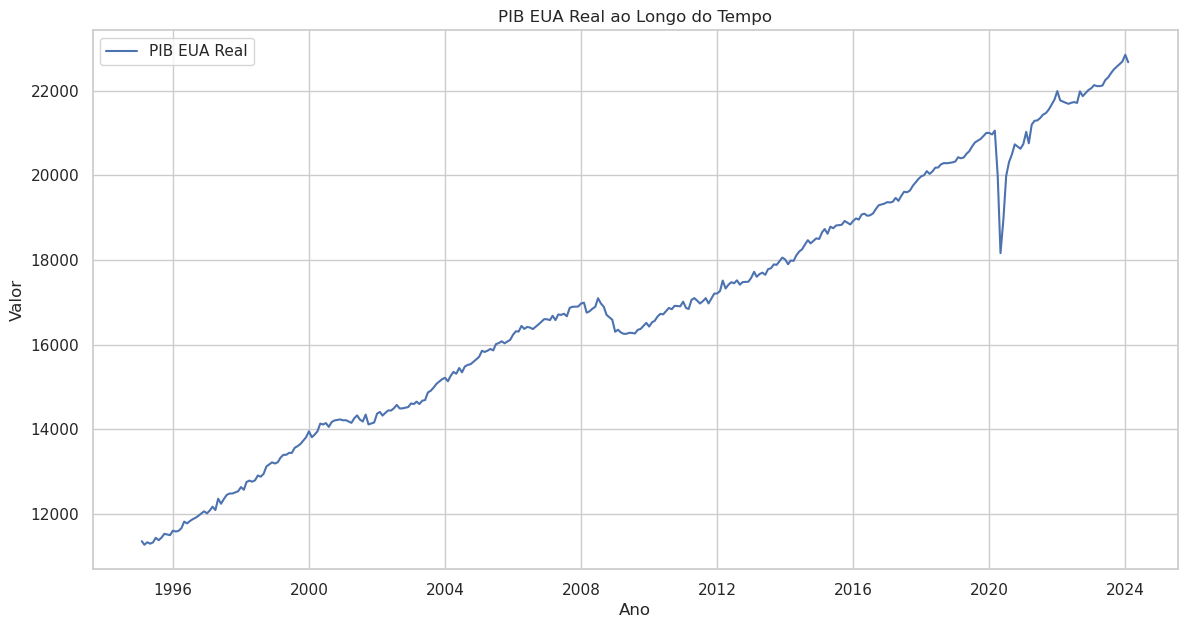

In [13]:
plot_linha_tempo(
    ["PIB EUA Real"],
    ["PIB EUA Real"],
    "PIB EUA Real ao Longo do Tempo",
)

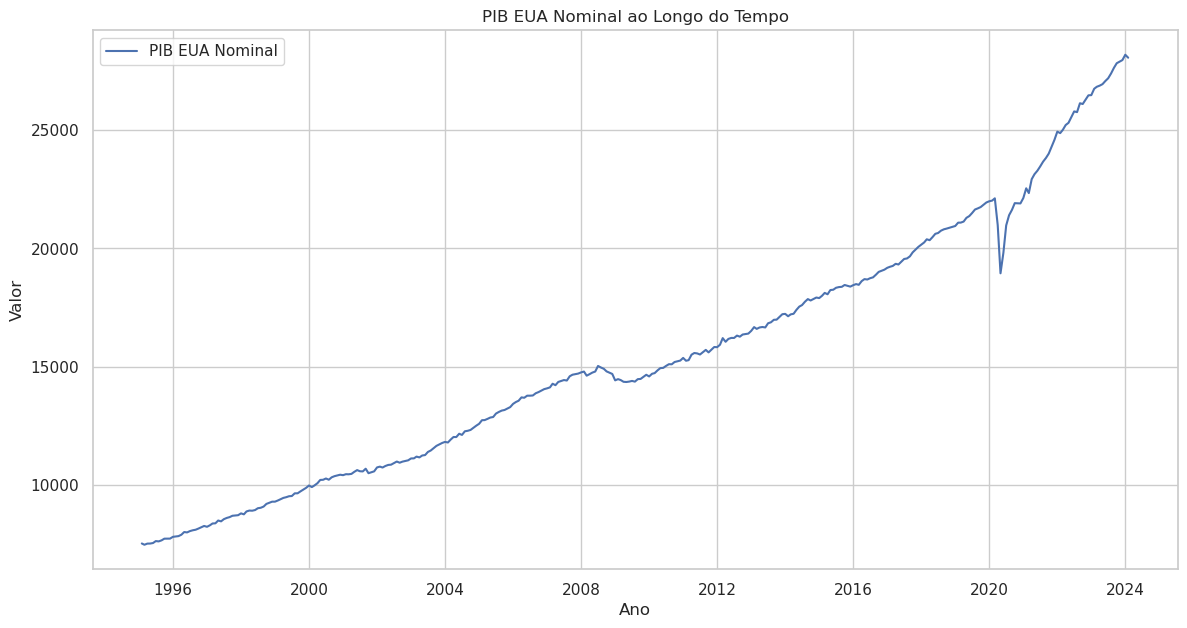

In [14]:
plot_linha_tempo(
    ["PIB EUA"],
    ["PIB EUA Nominal"],
    "PIB EUA Nominal ao Longo do Tempo",
)

In [26]:
def plot_linha_tempo_data(cols, labels, title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 7))
    for col, label in zip(cols, labels):
        plt.plot(dados.index, dados[col], label=label)
    plt.xlabel("Ano")
    plt.ylabel("Valor")
    plt.title(title)
    plt.gca().xaxis.grid(False)
    datas_verticais = [
        datetime(1997, 7, 1),   
        datetime(1998, 8, 1),   
        datetime(1999, 1, 1),
        datetime(2000, 1, 1),
        datetime(2008, 9, 1),
        datetime(2014, 9, 1),
        datetime(2017, 5, 1),
        datetime(2018, 5, 1),
        datetime(2020, 3, 1)
    ]
    for data in datas_verticais:
        plt.axvline(x=data, color='red', linestyle='--')
    plt.legend()
    plt.show()

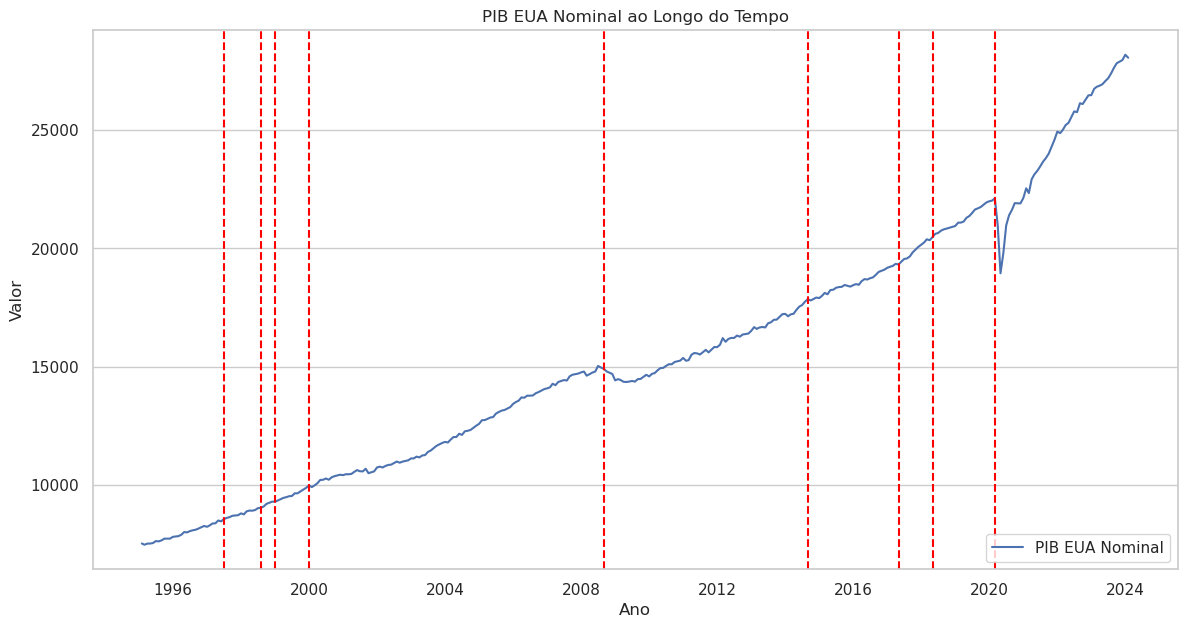

In [27]:
plot_linha_tempo_data(
    ["PIB EUA"],
    ["PIB EUA Nominal"],
    "PIB EUA Nominal ao Longo do Tempo",
)